In [1]:
#!pip pip install numpy --upgrade
#!pip install scapy
#!python -m spacy download en_core_web_lg
#!python -m spacy download en_core_web_sm
#!python -m spacy download en

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gowtham_babu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gowtham_babu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv('ZelenskyyUa_tweets.csv')
df = df[['Datetime', 'Tweet Id', 'Text', 'Username', 'Like Count', 'Reply Count', 'Retweet Count','Language']]
df.head()

,Datetime,Tweet Id,Text,Username,Like Count,Reply Count,Retweet Count,Language
0,2022-02-27 23:34:10+00:00,1498079039235502081,Also had a phone conversation with @vonderleye...,ZelenskyyUa,57452,2222,7335,en
1,2022-02-27 23:34:05+00:00,1498079017328648197,Також провів телефонну розмову з @vonderleyen....,ZelenskyyUa,12252,410,1307,uk
2,2022-02-27 23:25:42+00:00,1498076908860456964,Talked to 🇬🇧 Prime Minister @BorisJohnson and ...,ZelenskyyUa,89891,1887,10925,en
3,2022-02-27 23:25:36+00:00,1498076881995898885,Поговорив із Прем'єр-міністром 🇬🇧 @BorisJohnso...,ZelenskyyUa,16665,449,1861,uk
4,2022-02-27 22:56:21+00:00,1498069523467051008,"Thank you for the warm conversation, Your All-...",ZelenskyyUa,69747,1922,6880,en


In [4]:
df = df[['Datetime', 'Text', 'Like Count', 'Reply Count', 'Retweet Count', 'Language']]
df

,Datetime,Text,Like Count,Reply Count,Retweet Count,Language
0,2022-02-27 23:34:10+00:00,Also had a phone conversation with @vonderleye...,57452,2222,7335,en
1,2022-02-27 23:34:05+00:00,Також провів телефонну розмову з @vonderleyen....,12252,410,1307,uk
2,2022-02-27 23:25:42+00:00,Talked to 🇬🇧 Prime Minister @BorisJohnson and ...,89891,1887,10925,en
3,2022-02-27 23:25:36+00:00,Поговорив із Прем'єр-міністром 🇬🇧 @BorisJohnso...,16665,449,1861,uk
4,2022-02-27 22:56:21+00:00,"Thank you for the warm conversation, Your All-...",69747,1922,6880,en
...,...,...,...,...,...,...
1770,2019-05-08 13:56:16+00:00,"Сьогодні в Запоріжжі. Іван Залужний, капітан п...",2898,314,438,uk
1771,2019-05-07 12:37:38+00:00,У рамках анонсованих зустрічей із підприємцями...,1861,399,129,uk
1772,2019-05-07 11:49:07+00:00,Під час зустрічі з єврокомісаром @JHahnEU обго...,1733,125,120,uk
1773,2019-05-07 11:09:59+00:00,Вчора мав зустріч з главою Української греко-к...,1527,43,80,uk


In [5]:
df['year'] = pd.DatetimeIndex(df['Datetime']).year
df['month'] = pd.DatetimeIndex(df['Datetime']).month
df

,Datetime,Text,Like Count,Reply Count,Retweet Count,Language,year,month
0,2022-02-27 23:34:10+00:00,Also had a phone conversation with @vonderleye...,57452,2222,7335,en,2022,2
1,2022-02-27 23:34:05+00:00,Також провів телефонну розмову з @vonderleyen....,12252,410,1307,uk,2022,2
2,2022-02-27 23:25:42+00:00,Talked to 🇬🇧 Prime Minister @BorisJohnson and ...,89891,1887,10925,en,2022,2
3,2022-02-27 23:25:36+00:00,Поговорив із Прем'єр-міністром 🇬🇧 @BorisJohnso...,16665,449,1861,uk,2022,2
4,2022-02-27 22:56:21+00:00,"Thank you for the warm conversation, Your All-...",69747,1922,6880,en,2022,2
...,...,...,...,...,...,...,...,...
1770,2019-05-08 13:56:16+00:00,"Сьогодні в Запоріжжі. Іван Залужний, капітан п...",2898,314,438,uk,2019,5
1771,2019-05-07 12:37:38+00:00,У рамках анонсованих зустрічей із підприємцями...,1861,399,129,uk,2019,5
1772,2019-05-07 11:49:07+00:00,Під час зустрічі з єврокомісаром @JHahnEU обго...,1733,125,120,uk,2019,5
1773,2019-05-07 11:09:59+00:00,Вчора мав зустріч з главою Української греко-к...,1527,43,80,uk,2019,5


In [6]:
df['year'].value_counts()

2021    842
2020    534
2022    243
2019    156
Name: year, dtype: int64

In [7]:
df['Text'][0]

"Also had a phone conversation with @vonderleyen. Talked about concrete decisions on strengthening Ukraine's defense capabilities, macro-financial assistance and Ukraine's membership in the #EU."

In [8]:
pd.DataFrame(df.groupby(["year","month"])['Text'].count())

Text
year month      
2019 4         1
     5        23
     6        11
     7        19
     8        17
     9        14
     10       26
     11       26
     12       19
2020 1        60
     2        42
     3         5
     4        50
     5        27
     6        56
     7        56
     8        45
     9        45
     10       57
     11       55
     12       36
2021 1        36
     2        63
     3        84
     4        56
     5        88
     6       109
     7        95
     8        76
     9        51
     10       35
     11       70
     12       79
2022 1        43
     2       200

most of the tweets are posted as the war begun...

##### Lets see for year 2022

In [9]:
df22 = df[df['year'] == 2022]
df22 = df22['Text']
df22

0      Also had a phone conversation with @vonderleye...
1      Також провів телефонну розмову з @vonderleyen....
2      Talked to 🇬🇧 Prime Minister @BorisJohnson and ...
3      Поговорив із Прем'єр-міністром 🇬🇧 @BorisJohnso...
4      Thank you for the warm conversation, Your All-...
                             ...                        
238    Святий Різдвяний вечір – це найкраща мить для ...
239    The first international talk of the year with ...
240    Перша міжнародна розмова року із @POTUS доводи...
241    Congratulations to @EmmanuelMacron on starting...
242    Вітаю @EmmanuelMacron з початком головування 🇫...
Name: Text, Length: 243, dtype: object

In [10]:
#converting sentenses to words

all_sentences = []

for word in df22:
    all_sentences.append(word)

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
        lines.append(w)

In [11]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2 = []
for word in lines:
    if word != '':
        lines2.append(word)

In [19]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

In [20]:
#Removing all Stop Words
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)


In [14]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [15]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 536, 2: 183, 3: 58, 4: 44, 5: 21, 7: 15, 6: 12, 8: 9, 10: 8, 13: 7, ...})

/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


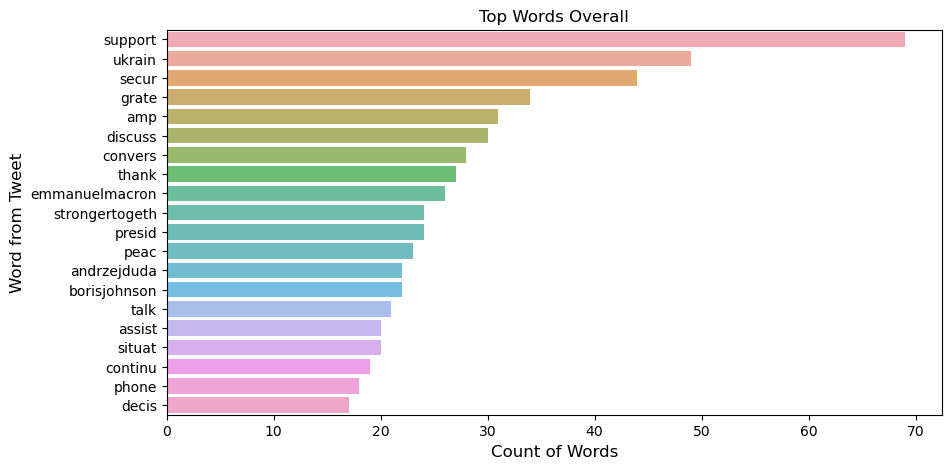

In [16]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


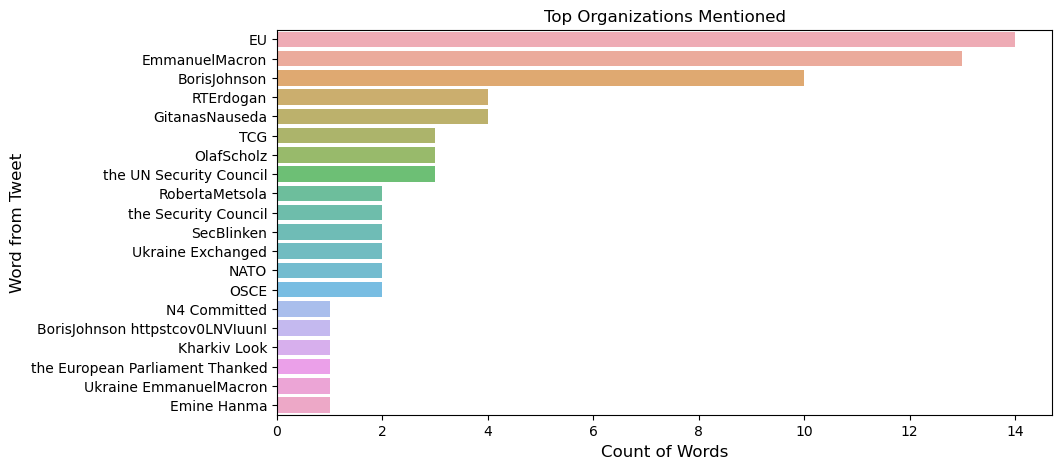

In [17]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
            
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()


df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

/Users/gowtham_babu/Desktop/tf/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


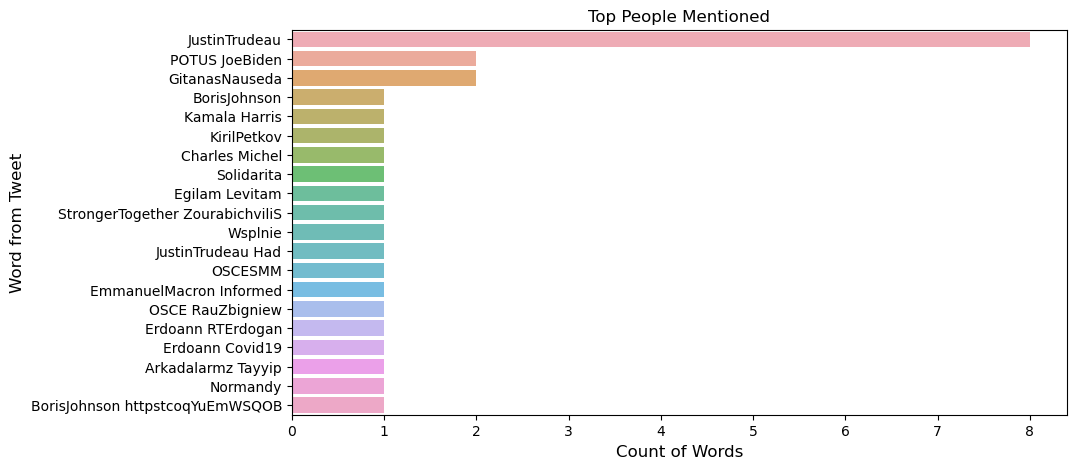

In [18]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()